In [41]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import glob

In [143]:
start = time.time()
datos = pd.read_excel('FILTRADOS.xlsx')
#datos = pd.read_csv('Para filtrar.csv')
print(time.time()-start)

32.33216881752014


In [144]:
try:
    datos.drop('Unnamed: 0.1', axis = 1, inplace = True)
except:
    pass
datos

,Unnamed: 0,Fecha,Hora,Irradiacion [Wh/m2],Energia [kWh],Temperatura de modulos [C]
0,1,1/10/2019,7:00,242.950833,15.220000,23.139167
1,2,1/10/2019,8:00,522.285000,34.786667,35.152500
2,10,1/10/2019,16:00,22.270833,2.545833,18.188333
3,13,2/10/2019,7:00,279.988333,17.638333,21.985833
4,14,2/10/2019,8:00,395.385833,26.570833,31.207500
...,...,...,...,...,...,...
3261,5463,29/12/2020,9:00,372.877500,16.214167,31.835833
3262,5466,29/12/2020,12:00,341.642500,14.330000,37.085833
3263,5477,30/12/2020,11:00,766.746667,31.209167,47.300000
3264,5487,31/12/2020,9:00,453.506667,18.785833,33.888333


In [145]:
horas = ['7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00','14:00', '15:00', '16:00']

In [146]:
irr_prom = []
ene_prom = []

irr_std = []
ene_std = []

for h in horas:
    df = datos[datos['Hora']==h]
    
    energy = df['Energia [kWh]'].mean()
    irradiance  =df['Irradiacion [Wh/m2]'].mean()
    
    energy_std = df['Energia [kWh]'].std()
    irradiance_std  =df['Irradiacion [Wh/m2]'].std()
    
    ene_prom.append(energy)
    irr_prom.append(irradiance)
    
    ene_std.append(energy_std)
    irr_std.append(irradiance_std)
promedios = pd.DataFrame({'Hora':horas,'Energia Prom [kWh]':ene_prom,
                        'Energia desv [kWh]': ene_std,'Irradiacion Prom [Wh/m2]':irr_prom,'Irradiacion desv [Wh/m2]':irr_std})
promedios.to_csv('Estadisticas por hora.csv')

In [147]:
promedios

,Hora,Energia Prom [kWh],Energia desv [kWh],Irradiacion Prom [Wh/m2],Irradiacion desv [Wh/m2]
0,7:00,9.633878,4.719489,176.306664,91.848731
1,8:00,19.232500,9.652308,341.390675,172.235160
2,9:00,25.391523,11.791569,450.050203,211.967324
3,10:00,29.648884,14.048207,522.564477,240.734338
4,11:00,30.590609,14.494163,543.991961,257.964527
5,12:00,27.844793,14.467104,489.756433,258.411439
6,13:00,21.177476,11.529207,362.078842,210.382802
7,14:00,15.608676,7.164322,281.872524,159.745050
8,15:00,9.500316,3.922633,159.507967,77.110201
9,16:00,5.802517,2.143809,90.338669,35.802080


In [148]:
rango1 = []
rango2 = []
horas = promedios['Hora']
for i in range(len(promedios)):
    lim1 = promedios['Irradiacion Prom [Wh/m2]'][i] - promedios['Irradiacion desv [Wh/m2]'][i]/2
    lim2 = promedios['Irradiacion Prom [Wh/m2]'][i] + promedios['Irradiacion desv [Wh/m2]'][i]/2
    
    rango1.append(lim1)
    rango2.append(lim2)
rangos = pd.DataFrame({'Hora':horas,'Limite Inf':rango1,'Limite Sup':rango2})
rangos.set_index('Hora',inplace = True)
rangos

,Limite Inf,Limite Sup
Hora,,
7:00,130.382298,222.231030
8:00,255.273095,427.508255
9:00,344.066541,556.033865
10:00,402.197308,642.931646
11:00,415.009698,672.974225
12:00,360.550713,618.962152
13:00,256.887442,467.270243
14:00,201.999999,361.745049
15:00,120.952866,198.063068


## Clasificación

In [149]:
m = len(datos)

soleados = [0]*m
lluviosos = [0]*m
nubados = [0]*m

horas = ['7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00','14:00', '15:00', '16:00']
fechas = datos.Fecha

for h in horas:
    inf = rangos['Limite Inf'][h]
    sup = rangos['Limite Sup'][h]
    for i in range(len(datos)):
        irr_actual =datos['Irradiacion [Wh/m2]'][i]
        
        if datos['Hora'][i] == h:
            if  irr_actual < inf:
                lluviosos[i] = 1
                
            elif inf < irr_actual < sup:
                nubados[i] = 1
            
            else:
                soleados[i] = 1

clima = pd.DataFrame({'Fecha':fechas,'Hora':datos['Hora'],'Lluvioso':lluviosos, 'Nublado':nubados,'Soleado':soleados})

In [150]:
clima.head(5)

,Fecha,Hora,Lluvioso,Nublado,Soleado
0,1/10/2019,7:00,0,0,1
1,1/10/2019,8:00,0,0,1
2,1/10/2019,16:00,1,0,0
3,2/10/2019,7:00,0,0,1
4,2/10/2019,8:00,0,1,0


(-1.118455871949145,
 1.1008788510451974,
 -1.1106839995875102,
 1.1014636055090765)

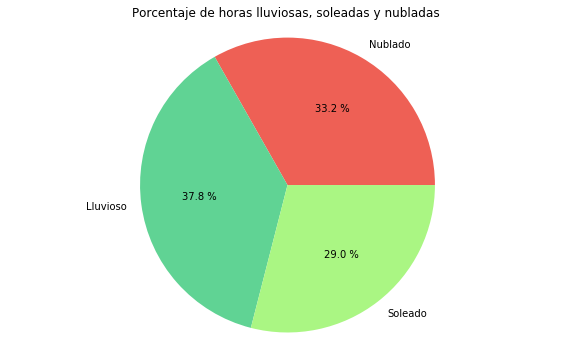

In [151]:
ndatos = len(datos)
counts = [sum(nubados)/ndatos, sum(lluviosos)/ndatos,sum(soleados)/ndatos]
estado = ['Nublado','Lluvioso','Soleado']

colores = ["#EE6055","#60D394","#AAF683"]

plt.figure(figsize=(10,6))
plt.pie(counts,labels = estado,autopct="%0.1f %%",colors = colores)
plt.title('Porcentaje de horas lluviosas, soleadas y nubladas')
plt.axis('equal')

# Muestra de 5496 datos

In [152]:
horas = clima.Hora.unique()
n = len(horas)
lluvia = [0]*n
sol = [0]*n
nube = [0]*n
for i in range(len(horas)):
    lluvia[i] = clima[clima['Hora']==horas[i]]['Lluvioso'].sum()
    sol[i] = clima[clima['Hora']==horas[i]]['Soleado'].sum()
    nube[i] = clima[clima['Hora']==horas[i]]['Nublado'].sum()
    
climaHora = pd.DataFrame({'Hora':horas,'Lluvioso':lluvia,'Soleado':sol,'Nublado':nube})
climaHora.set_index('Hora',inplace = True)

Text(0, 0.5, 'Frecuencia')

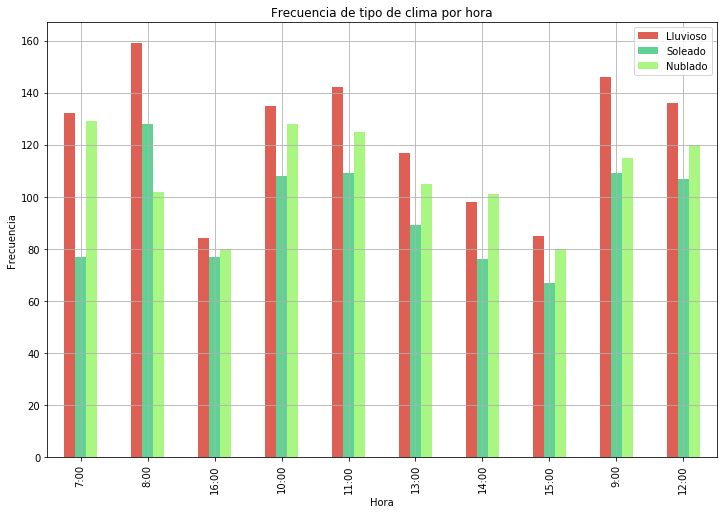

In [153]:
colores = ["#DE6055","#60D394","#AAF683"]
climaHora.plot.bar(figsize = (12,8),grid = True,color = colores)
plt.title('Frecuencia de tipo de clima por hora')
plt.ylabel('Frecuencia')

In [154]:
datos_clima = pd.concat([datos, clima[['Lluvioso','Nublado','Soleado']]],axis =1)
#datos_clima = datos
datos_clima

,Unnamed: 0,Fecha,Hora,Irradiacion [Wh/m2],Energia [kWh],Temperatura de modulos [C],Lluvioso,Nublado,Soleado
0,1,1/10/2019,7:00,242.950833,15.220000,23.139167,0,0,1
1,2,1/10/2019,8:00,522.285000,34.786667,35.152500,0,0,1
2,10,1/10/2019,16:00,22.270833,2.545833,18.188333,1,0,0
3,13,2/10/2019,7:00,279.988333,17.638333,21.985833,0,0,1
4,14,2/10/2019,8:00,395.385833,26.570833,31.207500,0,1,0
...,...,...,...,...,...,...,...,...,...
3261,5463,29/12/2020,9:00,372.877500,16.214167,31.835833,0,1,0
3262,5466,29/12/2020,12:00,341.642500,14.330000,37.085833,1,0,0
3263,5477,30/12/2020,11:00,766.746667,31.209167,47.300000,0,0,1
3264,5487,31/12/2020,9:00,453.506667,18.785833,33.888333,0,1,0


In [155]:
lluv_por_hora = datos_clima[datos_clima.Lluvioso == 1]
sol_por_hora = datos_clima[datos_clima.Soleado ==1]
nub_por_hora = datos_clima[datos_clima.Nublado ==1]

['7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00']
Ingrese una hora válida:12:00
Ingrese estado climático: [Lluvioso, Nublado, Soleado]Lluvioso

Histograma Lluvioso a la hora 12:00


Text(0, 0.5, 'Conteos')

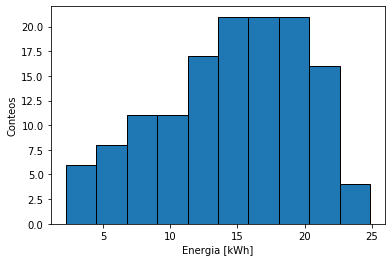

In [196]:
horas = ['7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00','14:00', '15:00', '16:00']
print(horas)
n = 10
h = input('Ingrese una hora válida:')

clima = input('Ingrese estado climático: [Lluvioso, Nublado, Soleado]')

print('\nHistograma',clima,'a la hora',h)
if clima =='Lluvioso':
    h_actual = lluv_por_hora[lluv_por_hora.Hora == h ]['Energia [kWh]']
    plt.hist(h_actual,bins=n,ec ='k')
    
elif clima == 'Nublado':
    h_actual = nub_por_hora[nub_por_hora.Hora == h ]['Energia [kWh]']
    plt.hist(h_actual,bins=n,ec ='k')

elif clima =='Soleado':
    h_actual = sol_por_hora[sol_por_hora.Hora == h ]['Energia [kWh]']
    plt.hist(h_actual,bins=n,ec ='k')
plt.xlabel('Energia [kWh]')
plt.ylabel('Conteos')

In [157]:
suma = 0
for h in horas:
    suma+=len(datos[datos.Hora ==h])
    print('Datos de la hora',h,':',len(datos[datos.Hora ==h])/4.58)
print('Total datos:',suma)

Datos de la hora 7:00 : 73.79912663755458
Datos de la hora 8:00 : 84.93449781659389
Datos de la hora 9:00 : 80.78602620087337
Datos de la hora 10:00 : 81.00436681222708
Datos de la hora 11:00 : 82.09606986899563
Datos de la hora 12:00 : 79.25764192139738
Datos de la hora 13:00 : 67.90393013100437
Datos de la hora 14:00 : 60.043668122270745
Datos de la hora 15:00 : 50.65502183406114
Datos de la hora 16:00 : 52.62008733624454
Total datos: 3266


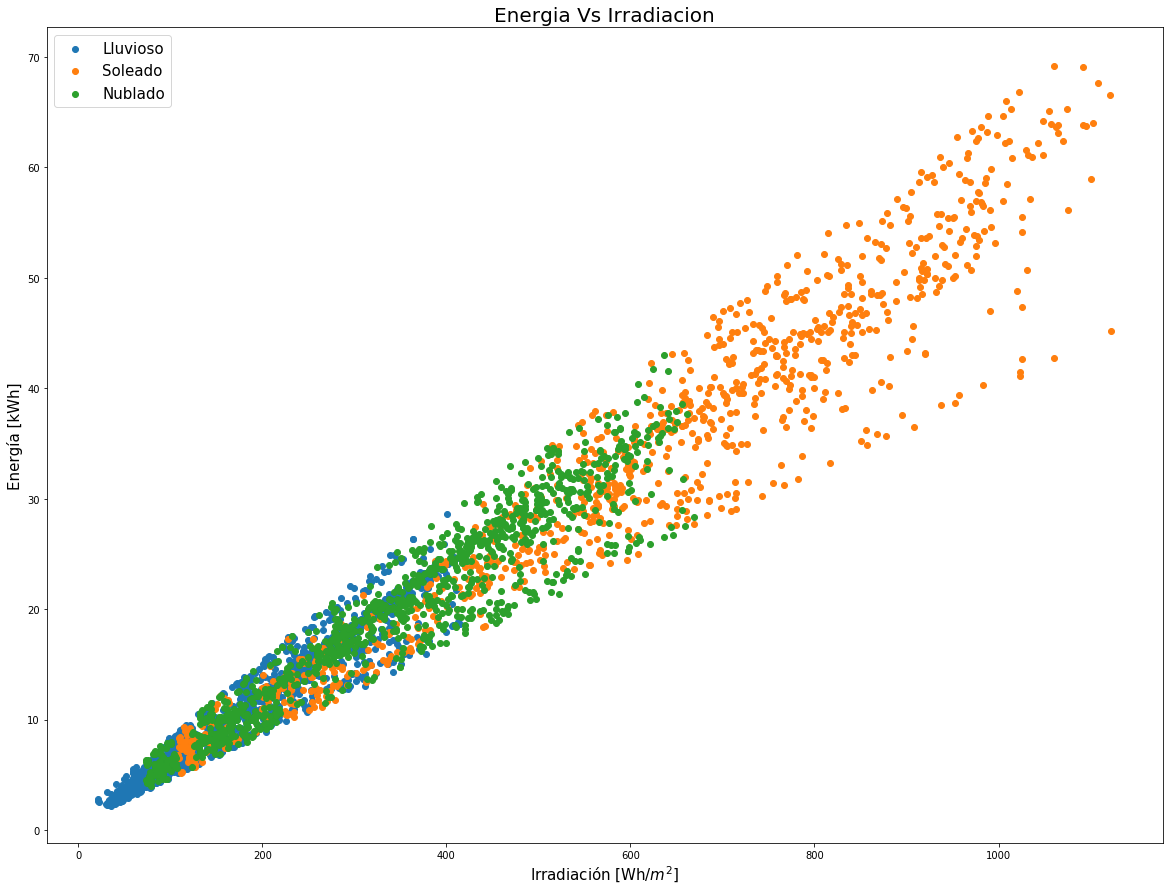

In [158]:
plt.figure(figsize = (20,15))
plt.scatter(lluv_por_hora['Irradiacion [Wh/m2]'],lluv_por_hora['Energia [kWh]'])
plt.scatter(sol_por_hora['Irradiacion [Wh/m2]'],sol_por_hora['Energia [kWh]'])
plt.scatter(nub_por_hora['Irradiacion [Wh/m2]'],nub_por_hora['Energia [kWh]'])
plt.title('Energia Vs Irradiacion',fontsize = 20)
plt.xlabel('Irradiación [Wh/$m^{2}$]',fontsize = 15)
plt.ylabel('Energía [kWh]',fontsize = 15)
plt.legend(('Lluvioso','Soleado','Nublado'),fontsize= 15)

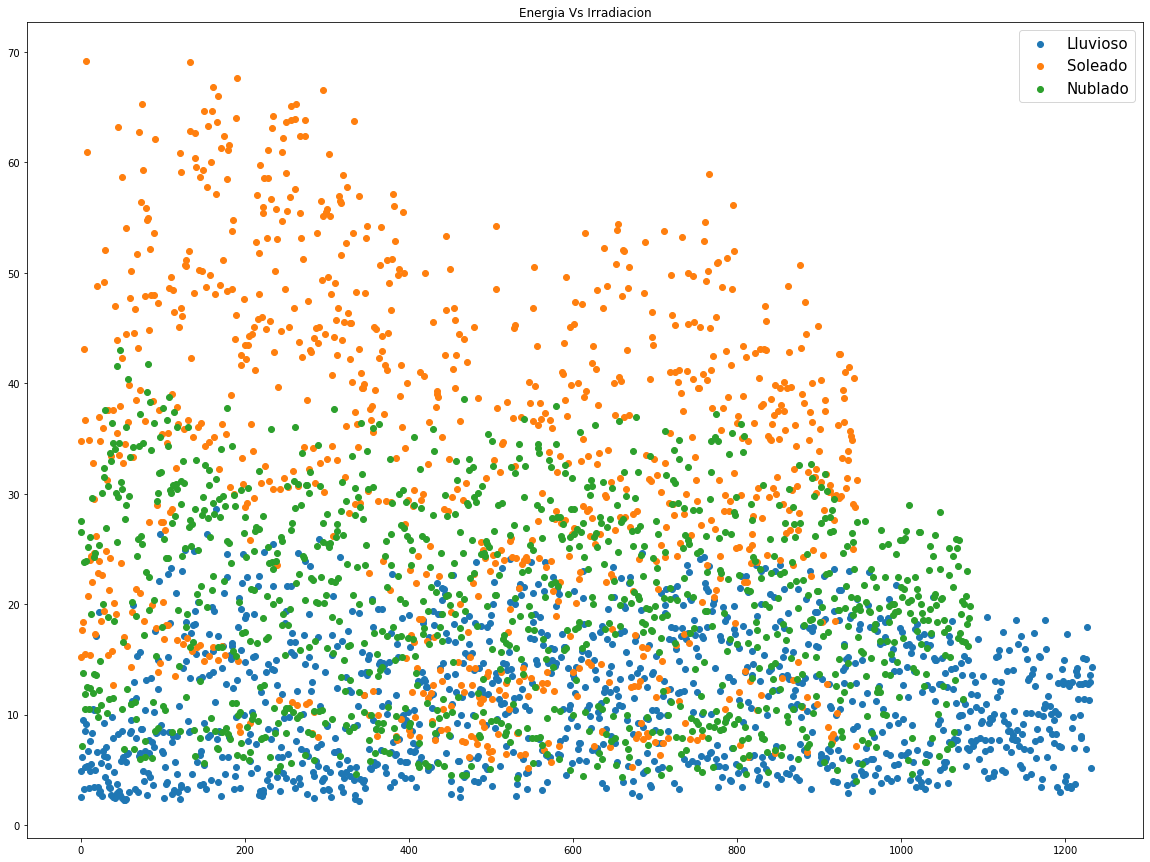

In [159]:
plt.figure(figsize = (20,15))
plt.scatter(range(len(lluv_por_hora)),lluv_por_hora['Energia [kWh]'])
plt.scatter(range(len(sol_por_hora)),sol_por_hora['Energia [kWh]'])
plt.scatter(range(len(nub_por_hora)),nub_por_hora['Energia [kWh]'])
plt.title('Energia Vs Irradiacion')
plt.legend(('Lluvioso','Soleado','Nublado'),fontsize= 15)